In [32]:
from src.build_graph import build_graph_from_txt

G = build_graph_from_txt("data/twitter_combined.txt")
print("Nós:", G.number_of_nodes())
print("Arestas:", G.number_of_edges())

# Constroí o grafo e exibe o número de nós e arestas dele
# Usando como base os dados do twitter

Nós: 81306
Arestas: 1768149


In [27]:
# 2️⃣ TRANSFORMAÇÃO EM SUBGRAFO (opcional)
from src.analysis import calcular_pagerank
import random
                                 # ← Defina qual tipo de subgrafo quer usar
usar_subgrafo_top = False        # ← Mude aqui se quiser um subgrafo dos mais influentes
usar_subgrafo_aleatorio = True   # ← Mude aqui se quiser um aleatório
n = 500                          # ← Tamanho do subgrafo

if usar_subgrafo_top:
    pagerank = calcular_pagerank(G)
    top_nos = sorted(pagerank, key=pagerank.get, reverse=True)[:n]
    G = G.subgraph(top_nos).copy()
    print(f"Subgrafo com os {n} nós mais influentes criado.")

elif usar_subgrafo_aleatorio:
    amostra = random.sample(list(G.nodes), min(n, G.number_of_nodes()))
    G = G.subgraph(amostra).copy()
    print(f"Subgrafo aleatório com {n} nós criado.")

# Verifica o novo tamanho do grafo
print("Novo número de nós:", G.number_of_nodes())
print("Novo número de arestas:", G.number_of_edges())

Subgrafo aleatório com 500 nós criado.
Novo número de nós: 500
Novo número de arestas: 47


In [33]:
from src.analysis import calcular_pagerank

# Calcular PageRank
pagerank = calcular_pagerank(G)
print("Top 5 nós por PageRank:")
for node, score in sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{node}: {score:.4f}")
    
# Avalia a importância dos nós com base em quantos outros nós importantes apontam para ele
# No contexto do Twitter, mede a "influência de usuários com base nas iterações recebidas"
# Estranhamente extremamente rápido 

# O score se trata de um valor númerico entre 0 e 1, normalmente com 4 ou 5 casas decimais, que representa
# a probabilidade de estar nesse nó em uma caminha aleatória
# (A soma de todos os scores do grafo dá 1)

Top 5 nós por PageRank:
115485051: 0.0061
116485573: 0.0051
813286: 0.0027
40981798: 0.0025
7861312: 0.0021


In [ ]:
from src.analysis import calcular_centralidades

# Calcular centralidades
centralidades = calcular_centralidades(G)
print("Top 1 em centralidade de grau:", max(centralidades["grau"], key=centralidades["grau"].get))

# - Grau: Usuários que mais interagem ou são mencionados
# - Intermediação: Conectam diferentes comunidades (pontes)
# - Proximidade: Espalham informações rapidamente 

In [5]:
from src.analysis import detectar_comunidades_louvain

# Comunidades Louvain
particoes = detectar_comunidades_louvain(G)
print("Número de comunidades detectadas:", len(set(particoes.values())))

#Algoritmo que encontra grupos de usuários com alta conexão interna.
#Ajuda a identificar "bolhas de desinformação ou câmaras de eco"

Número de comunidades detectadas: 10


In [ ]:
from src.analysis import detectar_comunidades_girvan_newman

# G precisa ser um grafo pequeno (ex: já transformado em subgrafo com 200 nós)
comunidades = detectar_comunidades_girvan_newman(G, num_comunidades=5)

print(f"{len(comunidades)} comunidades detectadas via Girvan-Newman")
for i, grupo in enumerate(comunidades):
    print(f"Comunidade {i+1} - {len(grupo)} nós")

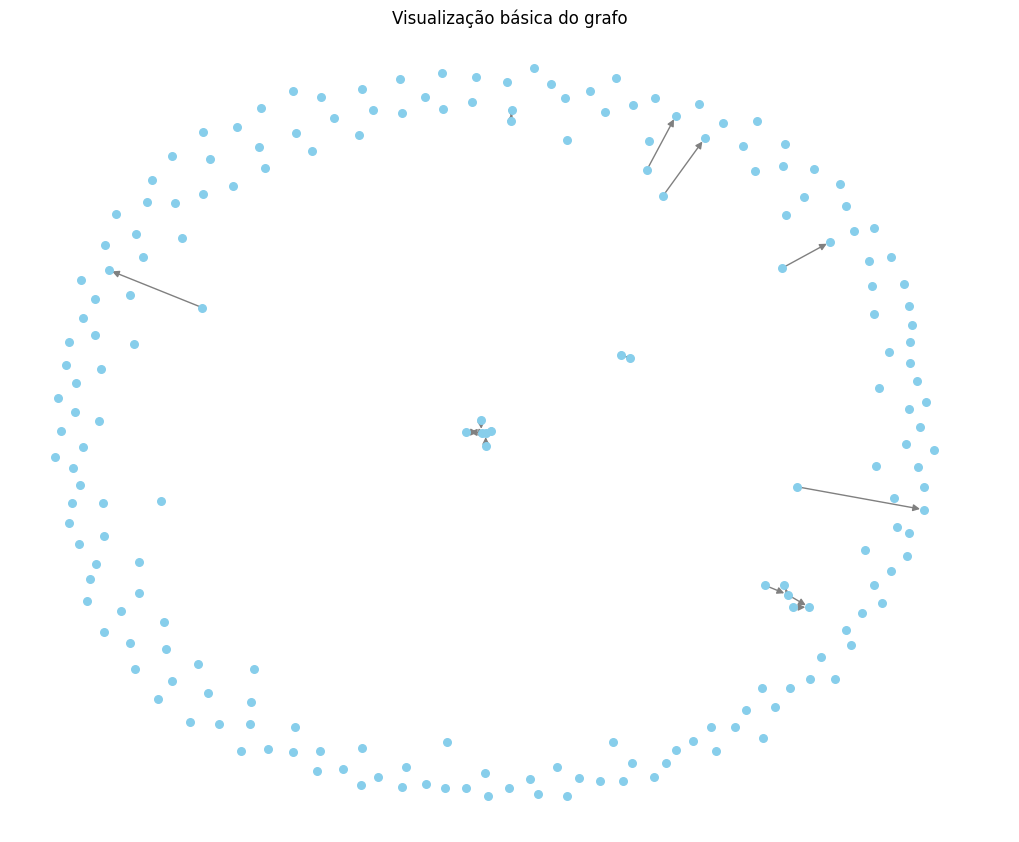

In [22]:
from src.visualize import plot_grafo_basico

plot_grafo_basico(G)  # Mostra primeiros 200 nós

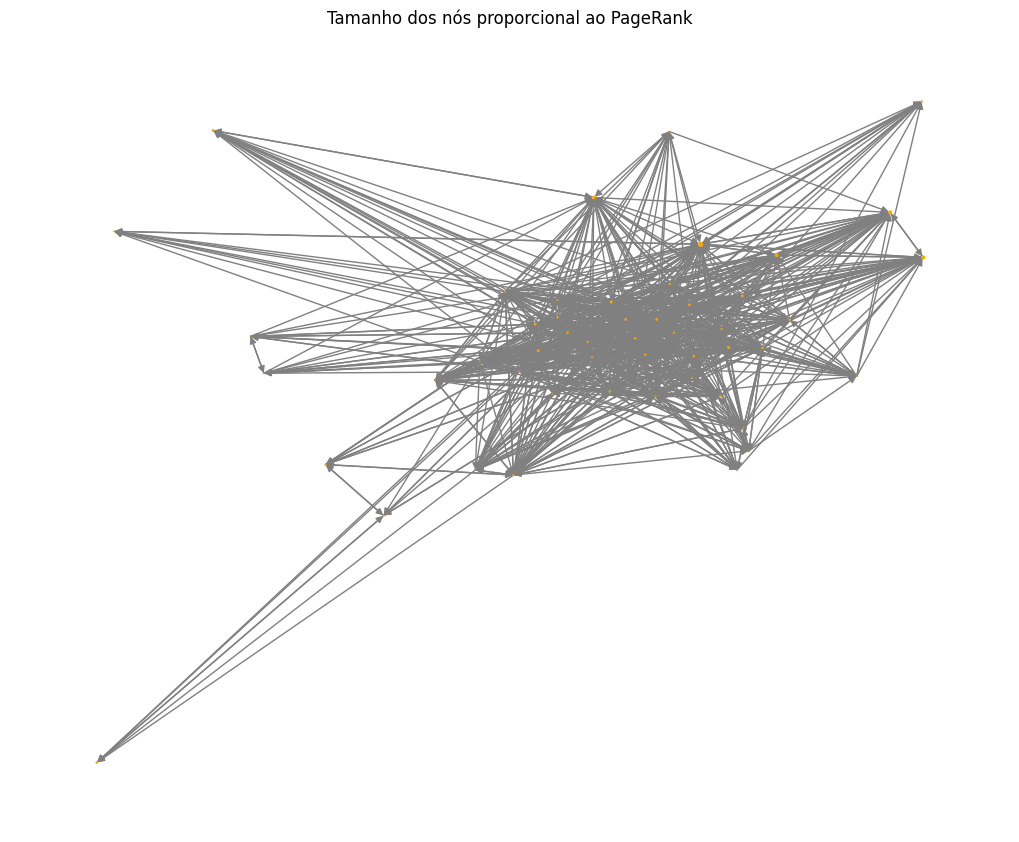

In [ ]:
# Visualizar um grafo com os nós dimensionados pelo valor do PageRank
# Precisa do grafo e do Pagerank pra ser executado
# Consegue ser executado mesmo com o grafo completo, mas recomendado que o num_nodes seja <= 300

from src.visualize import plot_pagerank

plot_pagerank(G, pagerank, num_nodes = 50)

In [23]:
from src.visualize import exportar_para_gephi

exportar_para_gephi(G)

Grafo exportado para: grafo_para_gephi.gexf
